In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def cut_lines(img, jingxidu=50):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    y_sum = np.sum(gray, axis = 1)
    max_y = max(y_sum)
    min_y = min(y_sum)
    yuzhi = max_y - int((max_y - min_y) / jingxidu)
    start_y = []
    end_y = []
    for i in range(1, len(y_sum)):
        if y_sum[i] > yuzhi and y_sum[i-1] < yuzhi:
            end_y.append(i)
        if y_sum[i] < yuzhi and y_sum[i-1] > yuzhi:
            start_y.append(i)
    output = []
    if len(start_y) == len(end_y):
        for i in range(len(start_y)):
            output.append([start_y[i], end_y[i]])
    return output

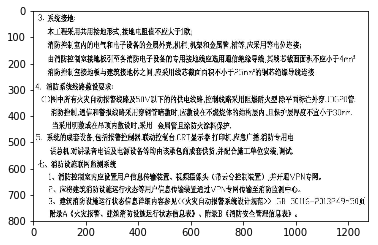

In [3]:
img = cv2.imread('temp_ocr3.jpg')
gray = cv2.imread('temp_ocr3.jpg', 0)
plt.imshow(img)
plt.show()

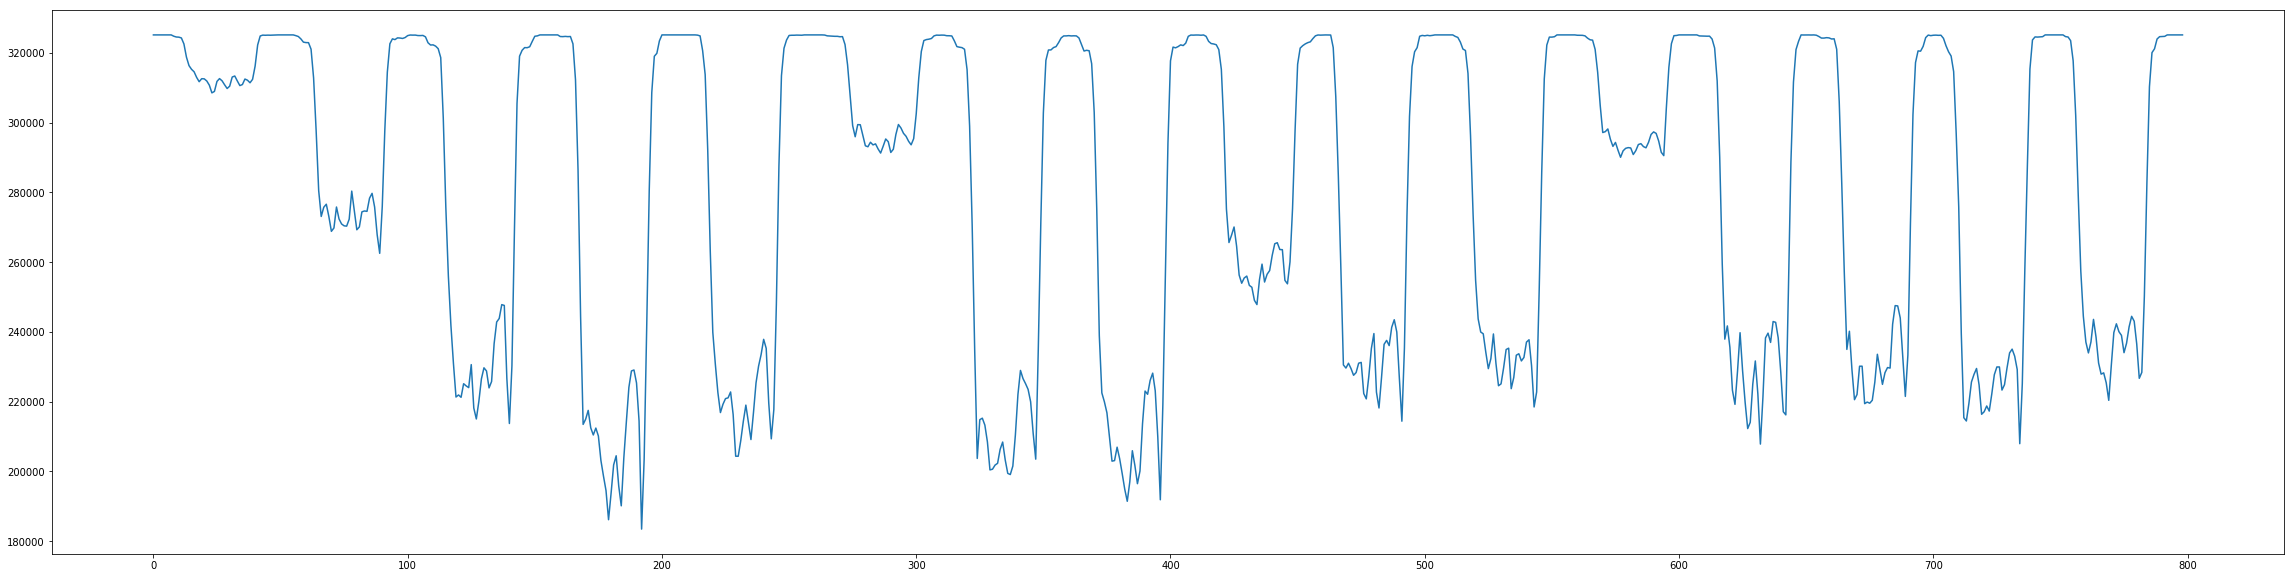

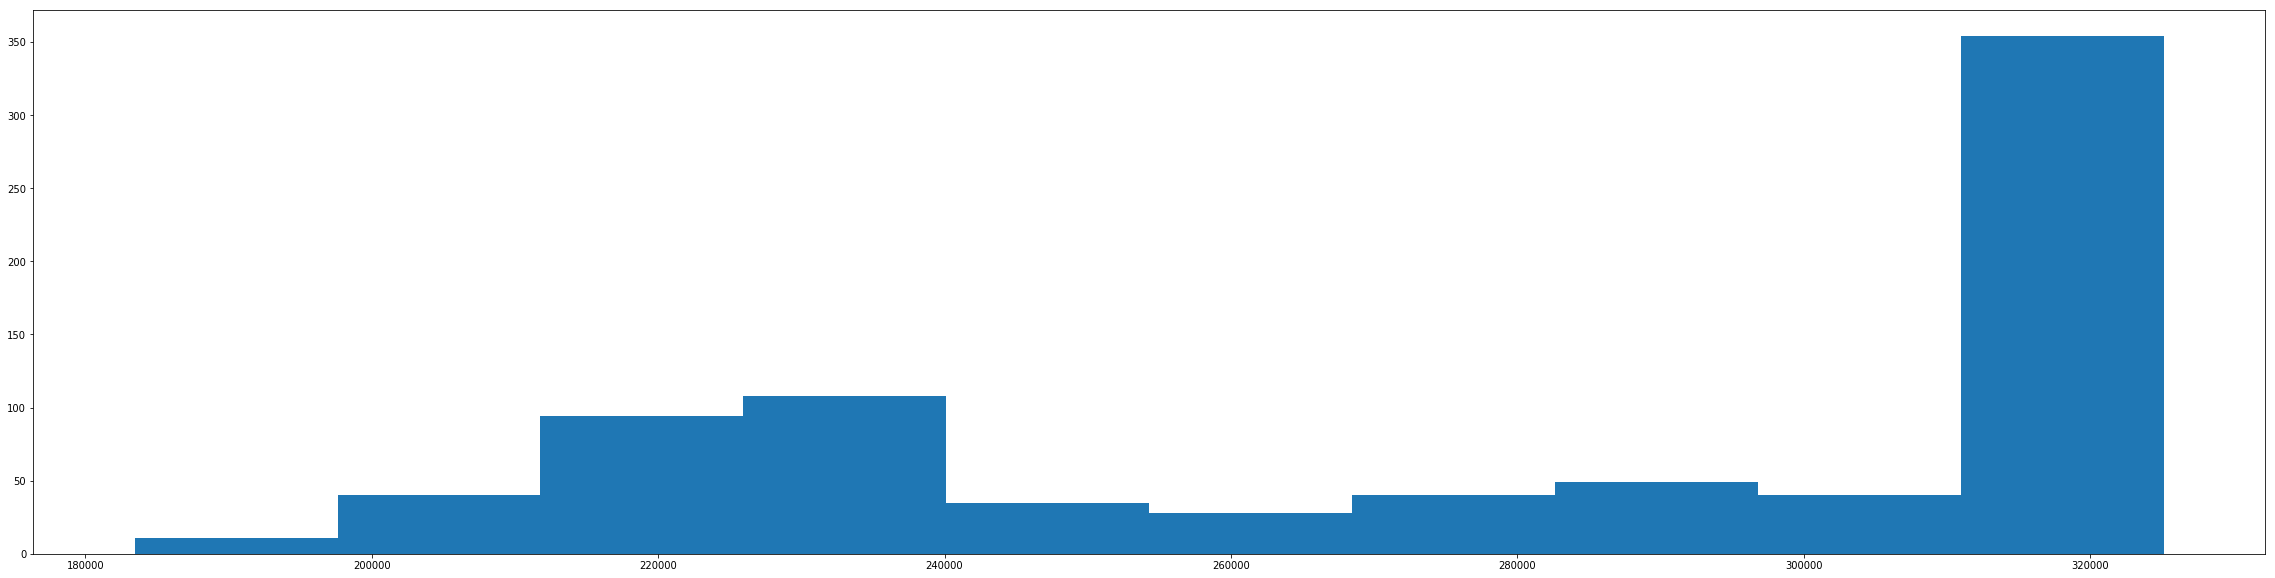

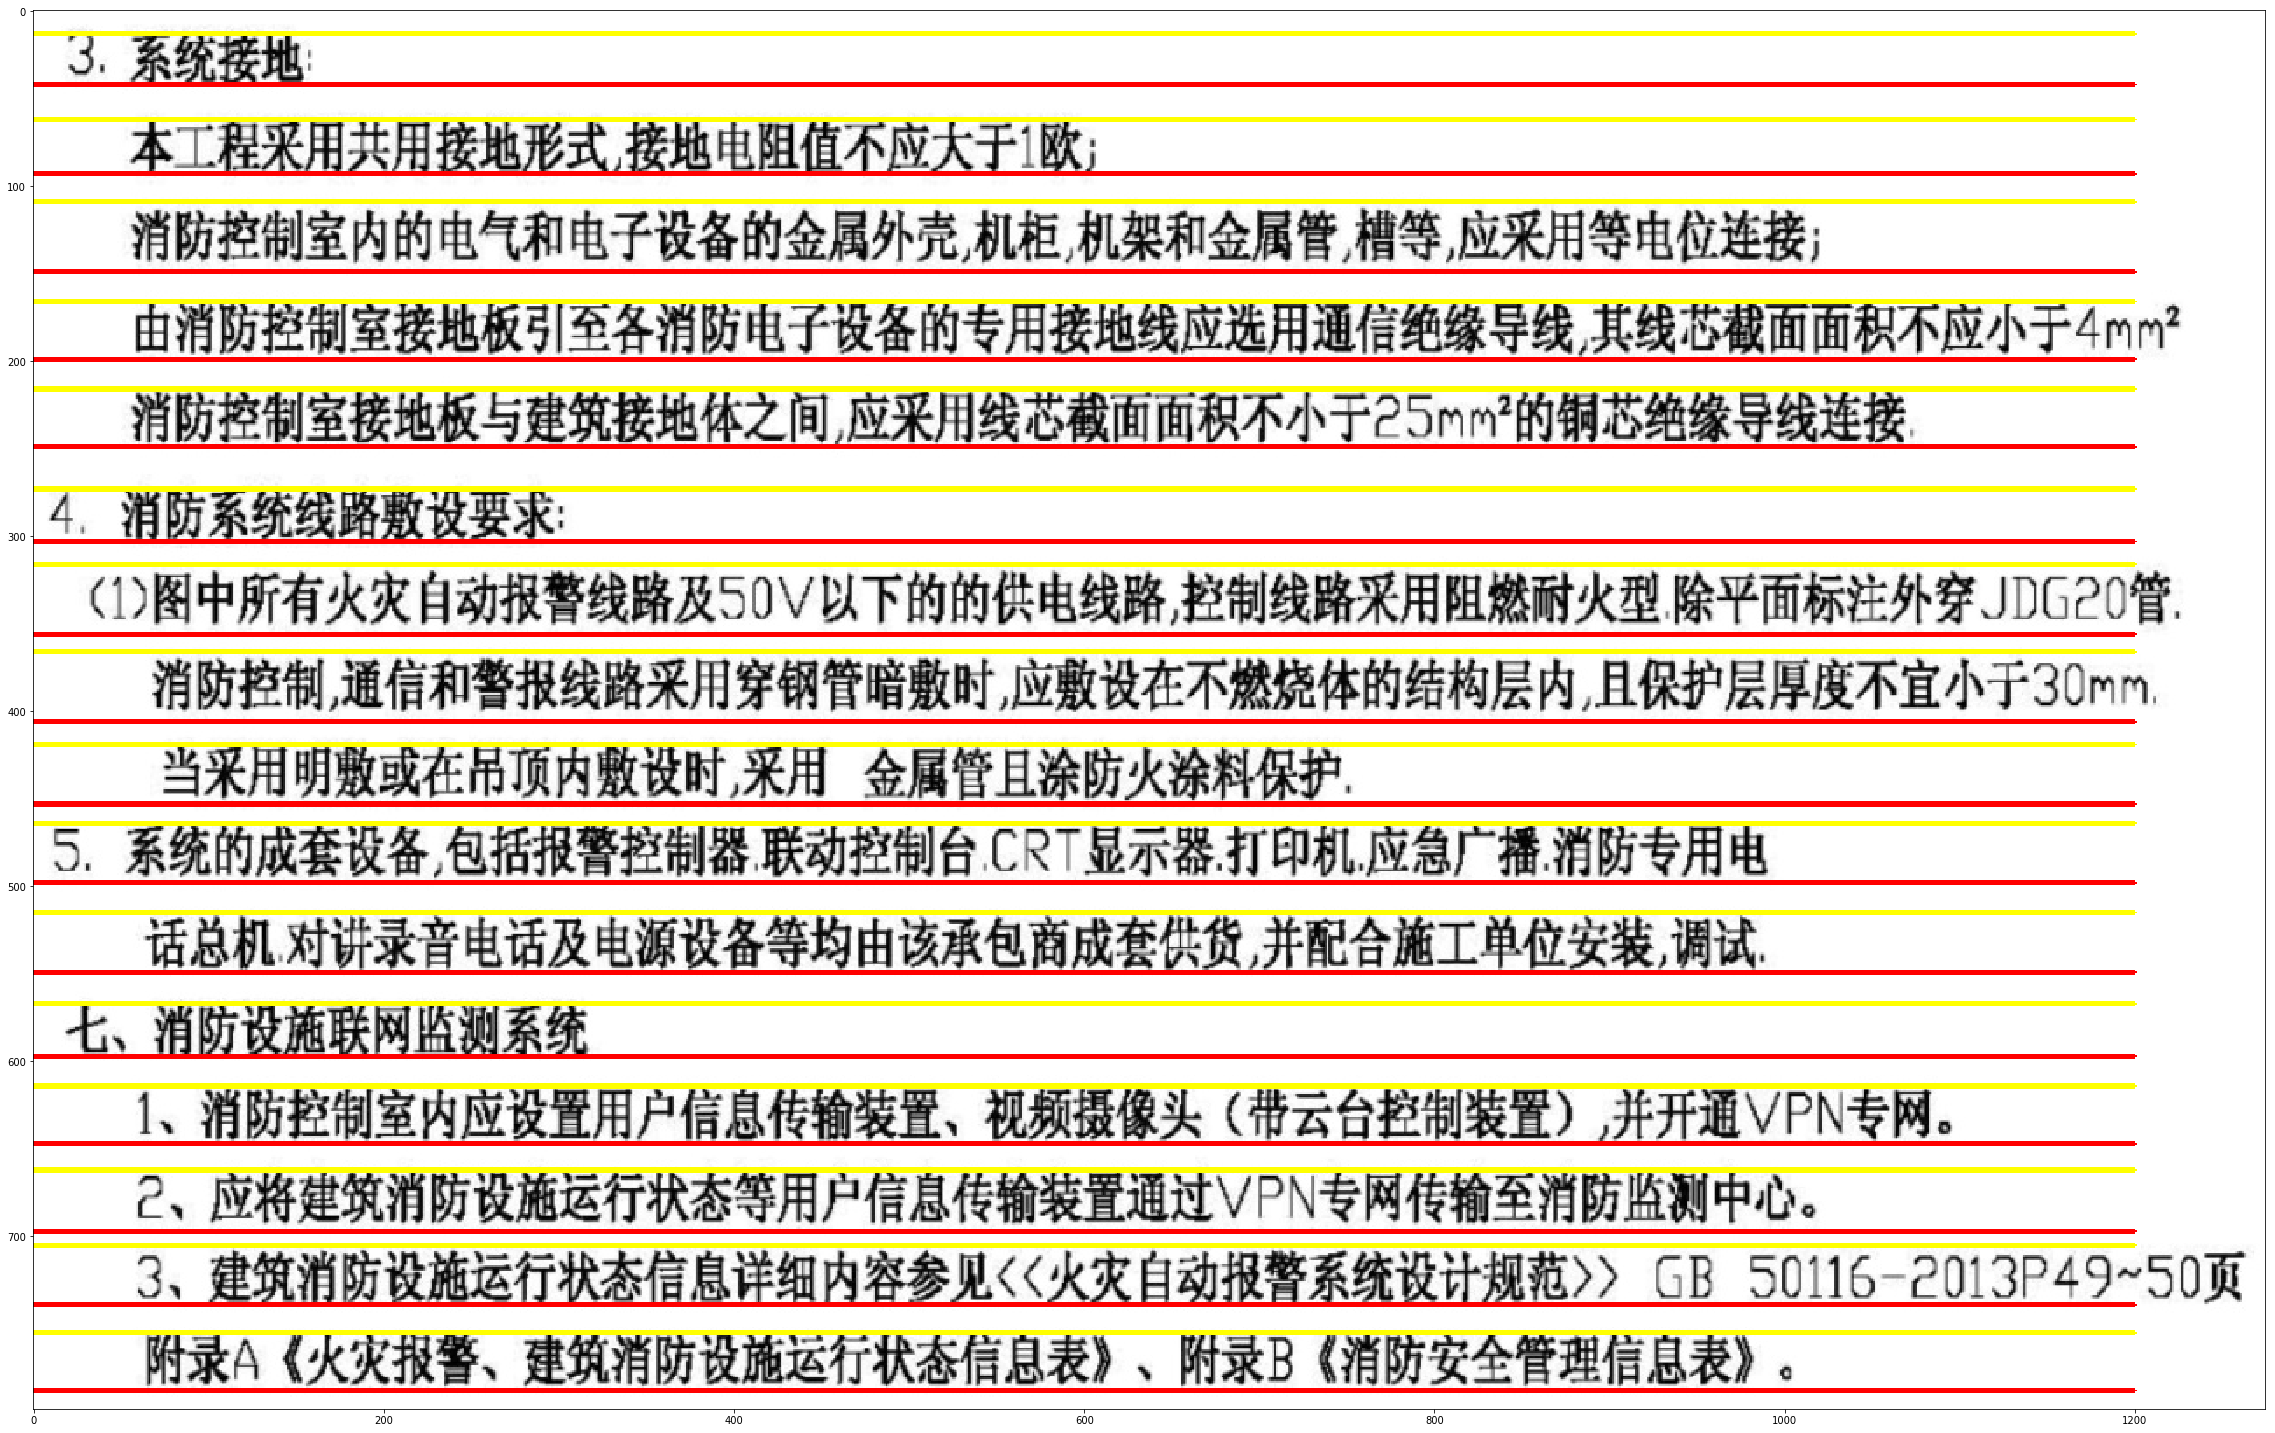

In [5]:
y_sum = np.sum(gray, axis = 1)
plt.figure(figsize=(40, 10))
plt.plot(y_sum)
plt.show()
max_y = max(y_sum)
min_y = min(y_sum)
yuzhi = max_y - int((max_y - min_y) / 50)
start_y = []
end_y = []
for i in range(1, len(y_sum)):
    if y_sum[i] > yuzhi and y_sum[i-1] < yuzhi:
        end_y.append(i)
    if y_sum[i] < yuzhi and y_sum[i-1] > yuzhi:
        start_y.append(i)

for i in range(len(start_y)):
    cv2.line(img, (0, start_y[i]), (1200, start_y[i]), (255,255,0), 2)
    cv2.line(img, (0, end_y[i]), (1200, end_y[i]), (255,0,0), 2)
plt.figure(figsize=(40, 10))
plt.hist(y_sum)
plt.show()
plt.figure(figsize=(40, 30))
plt.imshow(img)
plt.show()

In [5]:
output = cut_lines(img)
print(output)

[[13, 42], [62, 93], [109, 149], [166, 199], [216, 249], [273, 303], [316, 356], [366, 406], [419, 453], [464, 498], [515, 549], [567, 597], [614, 647], [662, 697], [705, 739], [755, 788]]


In [31]:
imgs = []
for line_idx in output:
    imgs.append(np.array(img[line_idx[0]:line_idx[1],:,:]))
#     plt.imshow(imgs[-1])
#     plt.show()

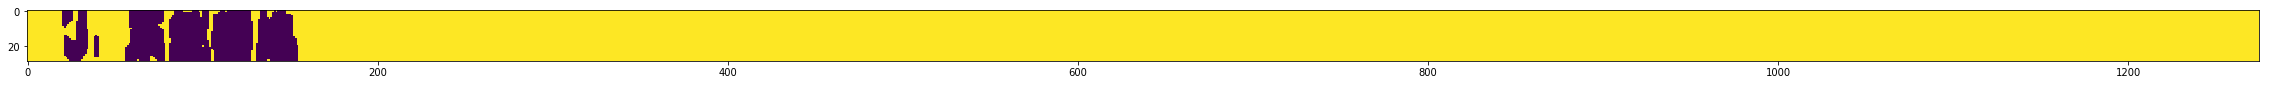

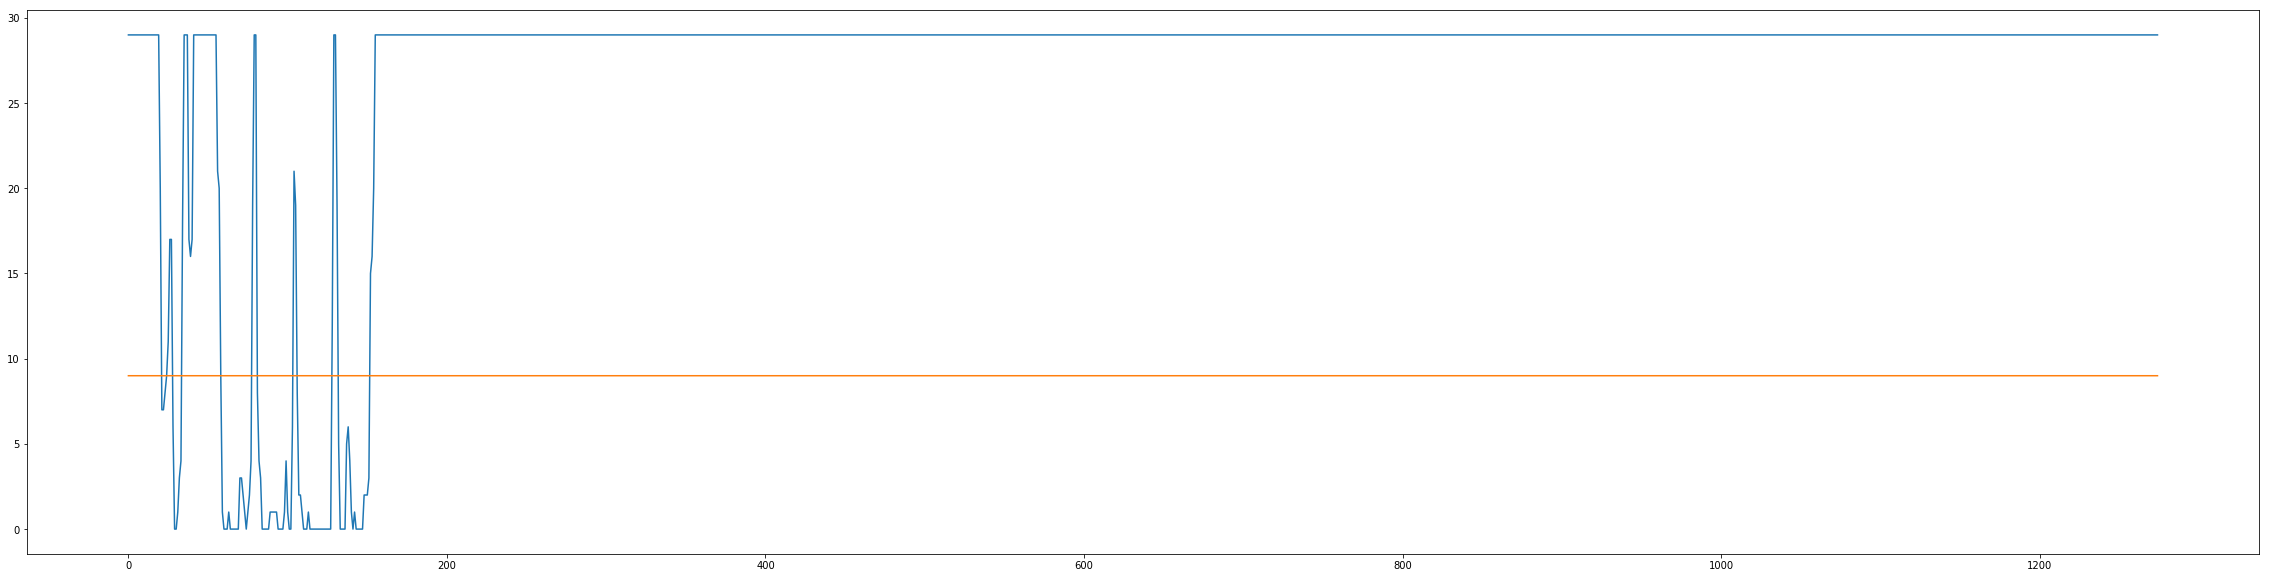

[21, 28, 38, 58, 81, 106, 131, 132] [34, 35, 41, 78, 79, 104, 128, 129, 152] 9 29 0


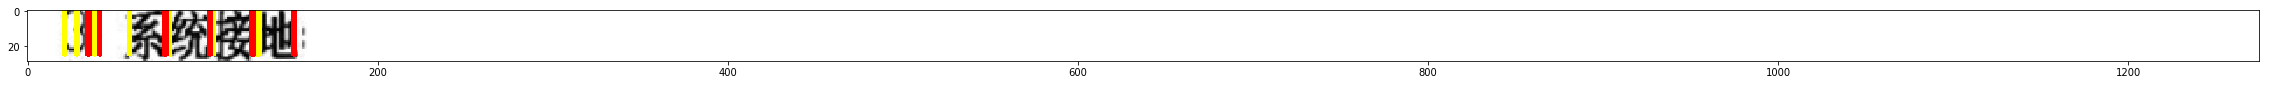

In [32]:
# 暂不使用
gray = cv2.cvtColor(imgs[0],  cv2.COLOR_BGR2GRAY)
th,erzhi=cv2.threshold(gray,0,1,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
erzhi = cv2.blur(erzhi, (3,3))
pengzhang=cv2.erode(erzhi,np.ones([10,1]),2)
x_sum = np.sum(pengzhang, axis = 0)
plt.figure(figsize=(40, 20))
plt.imshow(pengzhang)
plt.show()
max_x = max(x_sum)
min_x = min(x_sum)
yuzhi = int((max_x - min_x) / 3.2)
start_x = []
end_x = []
for i in range(1, len(x_sum)):
    if x_sum[i] > x_sum[i-1] and x_sum[i] - x_sum[i-1] > yuzhi:
        end_x.append(i)
    if x_sum[i] < x_sum[i-1] and x_sum[i-1] - x_sum[i] > yuzhi:
        start_x.append(i)
#     if x_sum[i] > yuzhi and x_sum[i-1] < yuzhi:
#             end_x.append(i)
#     if x_sum[i] < yuzhi and x_sum[i-1] > yuzhi:
#             start_x.append(i)
plt.figure(figsize=(40, 10))
plt.plot(x_sum)
plt.plot(np.ones(len(x_sum))*yuzhi)
plt.show()
#     print(abs(x_sum[i] - x_sum[i-5]),)
#     if abs(x_sum[i] - x_sum[i-3]) > yuzhi:
#         if x_sum[i] > x_sum[i-3]:
#             end_x.append(i)
#         else:
#             start_x.append(i)
print(start_x, end_x, yuzhi, max_x, min_x)
for i in range(len(start_x)):
    cv2.line(imgs[0], (start_x[i], 0), (start_x[i], 25), (255,255,0), 2)
for i in range(len(end_x)):
    cv2.line(imgs[0], (end_x[i], 0), (end_x[i], 25), (255,0,0), 2)

plt.figure(figsize=(40, 20))
plt.imshow(imgs[0])
plt.show()

In [3]:
# 使用cut line
img = cv2.imread('temp_ocr3.jpg')
output = cut_lines(img)
print(output)

[[13, 42], [62, 93], [109, 149], [166, 199], [216, 249], [273, 303], [316, 356], [366, 406], [419, 453], [464, 498], [515, 549], [567, 597], [614, 647], [662, 697], [705, 739], [755, 788]]


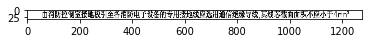

True

In [4]:
temp_img = img[output[3][0]:output[3][1], :, :]
plt.imshow(temp_img)
plt.show()
cv2.imwrite('temp_img.jpg', temp_img)